# Task 1
Calculations:
\begin{align*}
v_{x}(t) = -5sin(x)\\
v_{y}(t) = 5cos(x)\\
s_{x}(t) = \int v_{x}(t) = 5cos(x) + c_{x}\\
s_{x}(t) = \int v_{y}(t) = 5sin(x) + c_{y}
\end{align*}
Initial Conditions:
\begin{align*}
s_{x}(0) = 5; s_{y}(0) = 0
\end{align*}
Inserting initial conditions:
\begin{align*}
c_{x} = 0\\
c_{y} = 0\\
s_{x}(t) = 5cos(x)\\
s_{x}(t) = 5sin(x)
\end{align*}

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin, cos
print('Pakete sind geladen')

Pakete sind geladen


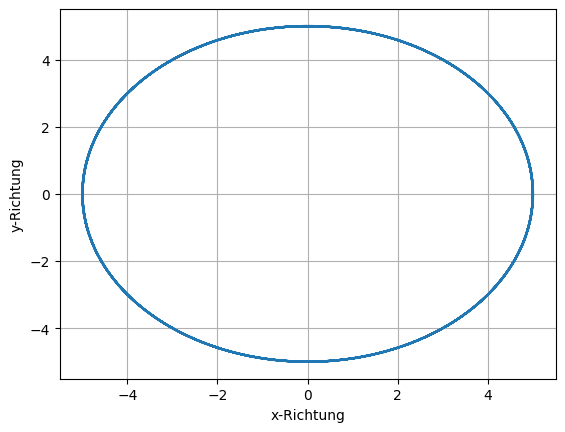

In [4]:
def model(y, t):
    v_x = -5*sin(t)
    v_y = 5 * cos(t)
    return [v_x, v_y]

init_val = [5, 0]
time_list = np.linspace(0,60,501)
sol = odeint(model, init_val, time_list)

plt.plot(sol[:,0], sol[:,1])
plt.xlabel('x-Richtung')
plt.ylabel('y-Richtung')
plt.grid()
plt.show()

# Projektion der Leine auf den Hund
Trainer:
\begin{align*}
v_{x}(t) = -5sin(x)\\
v_{y}(t) = 5cos(x)
\end{align*}

Hund:

\begin{align*}
v_{x}(t) = d_{x} * v_{x}\\
v_{y}(t) = d_{y} * v_{y}
\end{align*}

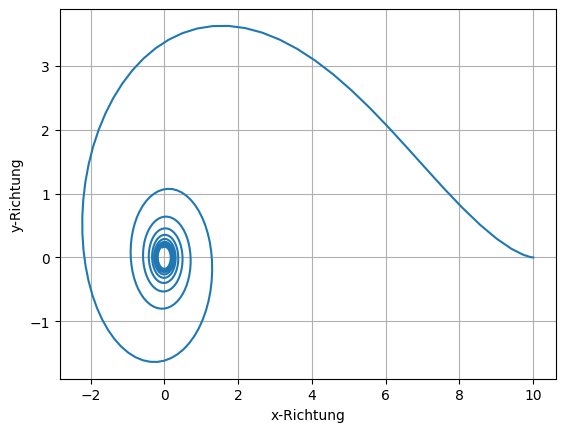

In [4]:

def model_dog(z,t):
    X,Y=z
    d=np.array([X-5*cos(t),Y-5*sin(t)]) # Richtungsvektor
    v=np.array([-5*sin(t),5*cos(t)]) # Geschwindigkeitsvektor
    sol=1/(d*d).sum()*np.dot(d,v)*d # Vektorprojektion
    return [sol[0],sol[1]]

initial=[10,0]
t = np.linspace(0, 60, 501)

sol = odeint(model_dog, initial, t)
plt.plot(sol[:,0], sol[:,1])
plt.xlabel('x-Richtung')
plt.ylabel('y-Richtung')
plt.grid()
plt.show()

# Task 4: Implement a List Scheduler

In [27]:
import pandas as pd
tf = pd.read_csv("data.txt", sep=" ")
data = tf.eine.to_list()

In [33]:
len(data)

1000

In [39]:
ressource_amount = 8
resssources = [0 for _ in range(ressource_amount)]

def TaskGenerator():
    for task in data:
        yield(task)

def list_scheduler():
    res_state = []
    res_sum = [0 for _ in range(ressource_amount)]
    task_gen = TaskGenerator()
    it = 0
    while True:
        it += 1
        #print(f'Iteration: {it}')
        for i in range(len(resssources)):
            if resssources[i] == 0:
                try:
                    resssources[i] = next(task_gen)
                except StopIteration as e:
                    print(res_sum)
                    return
                res_sum[i] += resssources[i]
                #print(res_sum)
        min_task = min(resssources)
        #print(resssources)
        for i in range(len(resssources)):
            resssources[i] = resssources[i] - min_task
        res_state.append([r for r in resssources])
        
list_scheduler()

[3293, 3293, 3319, 3299, 3293, 3297, 3309, 3310]


# Task 5 task pipeline

In [ ]:
# deterministic task runtimes in the following order:
# imgread left, grayscale left, sobel left,
# imgread right, grayscale right, sobel right, SAD, imgwrite
det_runtimes = [1, 2, 6, 1, 2, 6, 10, 1]
num_iterations = 1000

def get_parallel_runtime(task_runtimes):
    # compute completion time of sobel for left image on P0 and for right image on P1
    leftsobel = sum(task_runtimes[:3])
    rightsobel = sum(task_runtimes[3:6])
    # afterwards, SAD and imgwrite must be executed on P1
    return max(leftsobel, rightsobel) + sum(task_runtimes[6:])


def compute_stochastic_ms(det_runtimes, num_iterations):
    seq_runtimes = []
    par_runtimes = []
    current_runtimes = [None] * len(det_runtimes)
    for k in range(num_iterations):
        for i in range(len(det_runtimes)):
            current_runtimes[i] = (det_runtimes[i] + np.random.choice([-1,0,+1], 1, p=[0.4,0.1,0.5])[0])
        seq_runtimes.append(sum(current_runtimes))
        par_runtimes.append(get_parallel_runtime(current_runtimes))
    st_ms_seq = sum(seq_runtimes) / num_iterations
    st_ms_par = sum(par_runtimes) / num_iterations
    return st_ms_seq, st_ms_par

np.random.seed(2502)
seq_ms, par_ms = compute_stochastic_ms(det_runtimes, num_iterations)
print("makespan sequential execution:", seq_ms)
print("makespan parallel execution under given mapping:", par_ms)
